In [13]:
import numpy as np

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

In [14]:
batch_size = 32
num_classes = 10
epochs = 20

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline

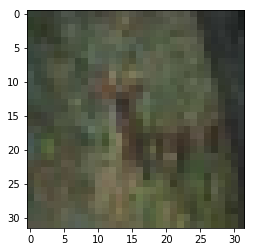

In [34]:
plt.imshow(x_train[10])
plt.show()

In [36]:
y_train[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
x_train.shape

(50000, 32, 32, 3)

# Data Preprocess (데이터 전처리)

In [17]:
height = 32
width = 32

In [18]:
# 데이터의 shape가 28, 28만 있기 때문에 gray scale에 맞춰 (28, 28, 1)로 맞추어 준다.
x_train = x_train.reshape(x_train.shape[0], height, width, 3)
x_test = x_test.reshape(x_test.shape[0], height, width, 3)

x_train.shape

(50000, 32, 32, 3)

In [19]:
x_train.dtype

dtype('uint8')

In [20]:
# 계산이 용이 하도록 데이터 형태를 float32로 변환
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [21]:
x_train.min(), x_train.max()

(0.0, 255.0)

In [22]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())
x_train.min(), x_train.max()

(0.0, 1.0)

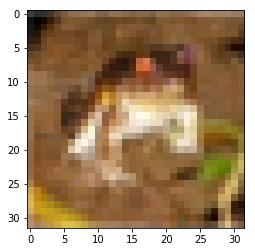

In [23]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.imshow(x_train[0, :, :, :])
plt.show()

In [24]:
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

# Build Model

In [26]:
input_shape = (height, width, 3)

In [27]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))  # 처음에만 input_shape를 지정. 후에는 이미 Output_shape을 알기 때문에 불필요 
model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

# Train Model

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
datagen = ImageDataGenerator(featurewise_std_normalization=True, 
                             rotation_range=5,
                             width_shift_range=4, 
                             height_shift_range=4)

C:\Users\JoonHo Lee\Anaconda3\lib\site-packages\keras_preprocessing\image.py:799: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [31]:
datagen.fit(x_train)

In [32]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=epochs)

Epoch 1/20
 61/782 [=>............................] - ETA: 2:40:09 - loss: 14.3341 - acc: 0.0981

KeyboardInterrupt: 

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # Kerase 자체에서 Display를 제공. 0~2까지 있다. 값이 높으면 높을 수록 학습 속도에 영향.
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
  224/50000 [..............................] - ETA: 7:53:56 - loss: 12.9932 - acc: 0.0714

In [ ]:
score = model.evaluate(x_test, y_test)

In [ ]:
print("Test Loss:\t", score[0])
print("Test Accuracy:\t", score[1])